# Predicting breast cancer using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has breast cancer based on their medical attributes.

## Preparing the tools


We are going to use pandas, matplotlib, numpy for data analysis and manipulation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For plot to appear inside the notebook
%matplotlib inline

#Models from Scikit-learn
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB


#Model Evaluations 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# from sklearn.metrics import plot_roc_curve

## LOAD DATA

In [3]:
df = pd.read_csv("Breast-data.csv")
df.shape 

(698, 11)

## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter expert on the dataset you working with.

* What question(s) are you trying to solve ?
* What kind of data do we have and how do we treat different types ?
* What's missing from the data and how to deal with it ?
* Where are the outliers and why should we care about them ? [In statistics, an outlier is a data point that differs significantly from other observations]
* How can you add, change or remove features to get more out of your data ?

In [4]:
# keys in dataset
df.keys()

Index(['Sample Code Number', 'Clump Thickness', 'Uniformility of cell size',
       'Uniformility of cell shape', 'Marginal Adhesion',
       'Single Epithelial Cell', 'Bare Nuclei', 'Bland chromation',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [5]:
df.head()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1


In [6]:
df.tail()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
693,776715,3,1,1,1,3,2,1,1,1,0
694,841769,2,1,1,1,2,1,1,1,1,0
695,888820,5,10,10,3,7,3,8,10,2,1
696,897471,4,8,6,4,3,4,10,6,1,1
697,897471,4,8,8,5,4,5,10,4,1,1


In [7]:
df.drop(['Sample Code Number'], axis=1, inplace=True)
df

,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2,1,1,1,0
694,2,1,1,1,2,1,1,1,1,0
695,5,10,10,3,7,3,8,10,2,1
696,4,8,6,4,3,4,10,6,1,1


In [8]:
print(df['Bland chromation'].unique())

[ 3  9  1  2  4  5  7  8  6 10]


In [9]:
print(df['Mitoses'].unique())
print(df['Class'].unique())

[ 1  5  4  2  3  7 10  8  6]
[0 1]


In [10]:
## Finding out how many of each class are there 

df["Class"].value_counts()

0    457
1    241
Name: Class, dtype: int64

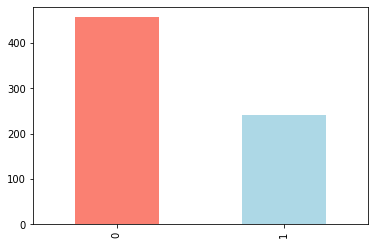

In [11]:
df["Class"].value_counts().plot(kind="bar", color=["salmon","lightblue"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Clump Thickness             698 non-null    int64
 1   Uniformility of cell size   698 non-null    int64
 2   Uniformility of cell shape  698 non-null    int64
 3   Marginal Adhesion           698 non-null    int64
 4   Single Epithelial Cell      698 non-null    int64
 5   Bare Nuclei                 698 non-null    int64
 6   Bland chromation            698 non-null    int64
 7   Normal Nucleoli             698 non-null    int64
 8   Mitoses                     698 non-null    int64
 9   Class                       698 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [13]:
## Are there any missing values ? isna() or 'isnull()' function is used to detect missing values.

df.isna().sum() 

Clump Thickness               0
Uniformility of cell size     0
Uniformility of cell shape    0
Marginal Adhesion             0
Single Epithelial Cell        0
Bare Nuclei                   0
Bland chromation              0
Normal Nucleoli               0
Mitoses                       0
Class                         0
dtype: int64

In [14]:
df.describe()

,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,4.416905,3.137536,3.210602,2.809456,3.217765,3.510029,3.438395,2.869628,1.590258,0.345272
std,2.817673,3.052575,2.972867,2.856606,2.215408,3.614579,2.440056,3.055004,1.716162,0.475798
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


## Breast Cancer Frequency according to Clump Thickness

In [15]:
df.head(8)

,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1
5,1,1,1,1,2,10,3,1,1,0
6,2,1,2,1,2,1,3,1,1,0
7,2,1,1,1,2,1,1,1,5,0


In [16]:
df["Clump Thickness"].value_counts()

1     145
5     129
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump Thickness, dtype: int64

In [17]:
## Compare Class column with Clump Thickness 

pd.crosstab(df.Class, df["Clump Thickness"])

Clump Thickness,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
0,142,46,96,66,83,16,2,5,0,1
1,3,4,12,14,46,18,21,41,14,68


(array([0, 1]), <a list of 2 Text xticklabel objects>)

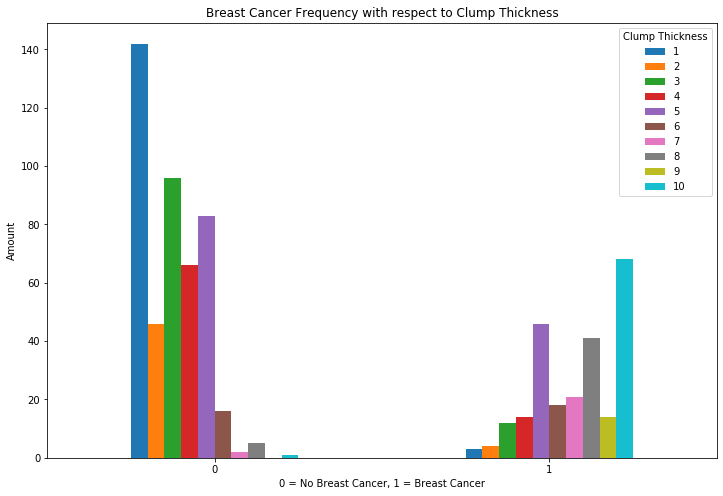

In [18]:
## Create a plot of crosstab

pd.crosstab(df["Class"], df["Clump Thickness"]).plot(kind="bar",
                                                     figsize=(12,8))

plt.title("Breast Cancer Frequency with respect to Clump Thickness")
plt.xlabel("0 = No Breast Cancer, 1 = Breast Cancer")
plt.ylabel("Amount")
plt.xticks(rotation=0)

In [19]:
df["Uniformility of cell shape"].value_counts()

1     352
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: Uniformility of cell shape, dtype: int64

In [20]:
df["Marginal Adhesion"].value_counts()

1     406
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal Adhesion, dtype: int64

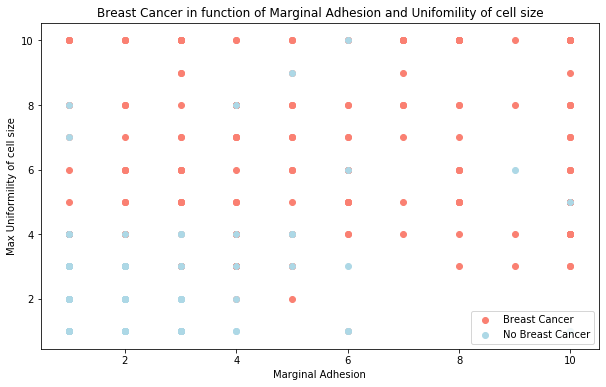

In [21]:
## CREATING ANOTHER FIGURE 

plt.figure(figsize=(10,6))

# Scatter with positive example
plt.scatter(df["Marginal Adhesion"][df["Class"]==1],
            df["Uniformility of cell size"][df["Class"]==1],
            color=["salmon"])

# Scatter with negative example 
plt.scatter(df["Marginal Adhesion"][df["Class"]==0],
            df["Uniformility of cell size"][df["Class"]==0],
            color=["lightblue"]) 

plt.title("Breast Cancer in function of Marginal Adhesion and Unifomility of cell size")
plt.xlabel("Marginal Adhesion")
plt.ylabel("Max Uniformility of cell size")
plt.legend(["Breast Cancer","No Breast Cancer"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bf67bdbd0>,
      dtype=object)

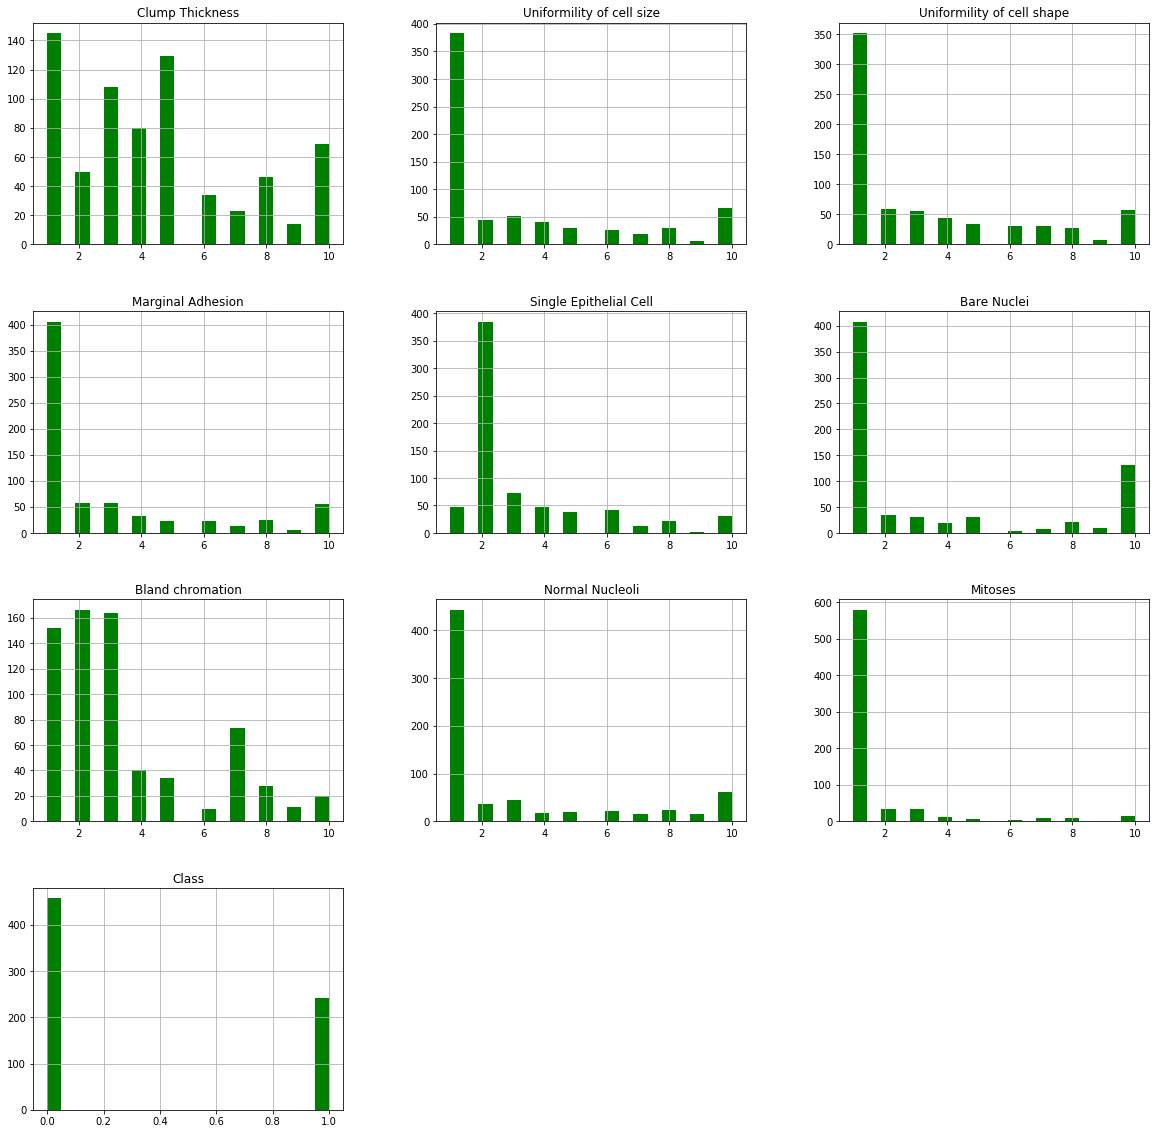

In [22]:
#plotting the histogram
df.hist(bins = 20, figsize = (20,20), color = 'g')

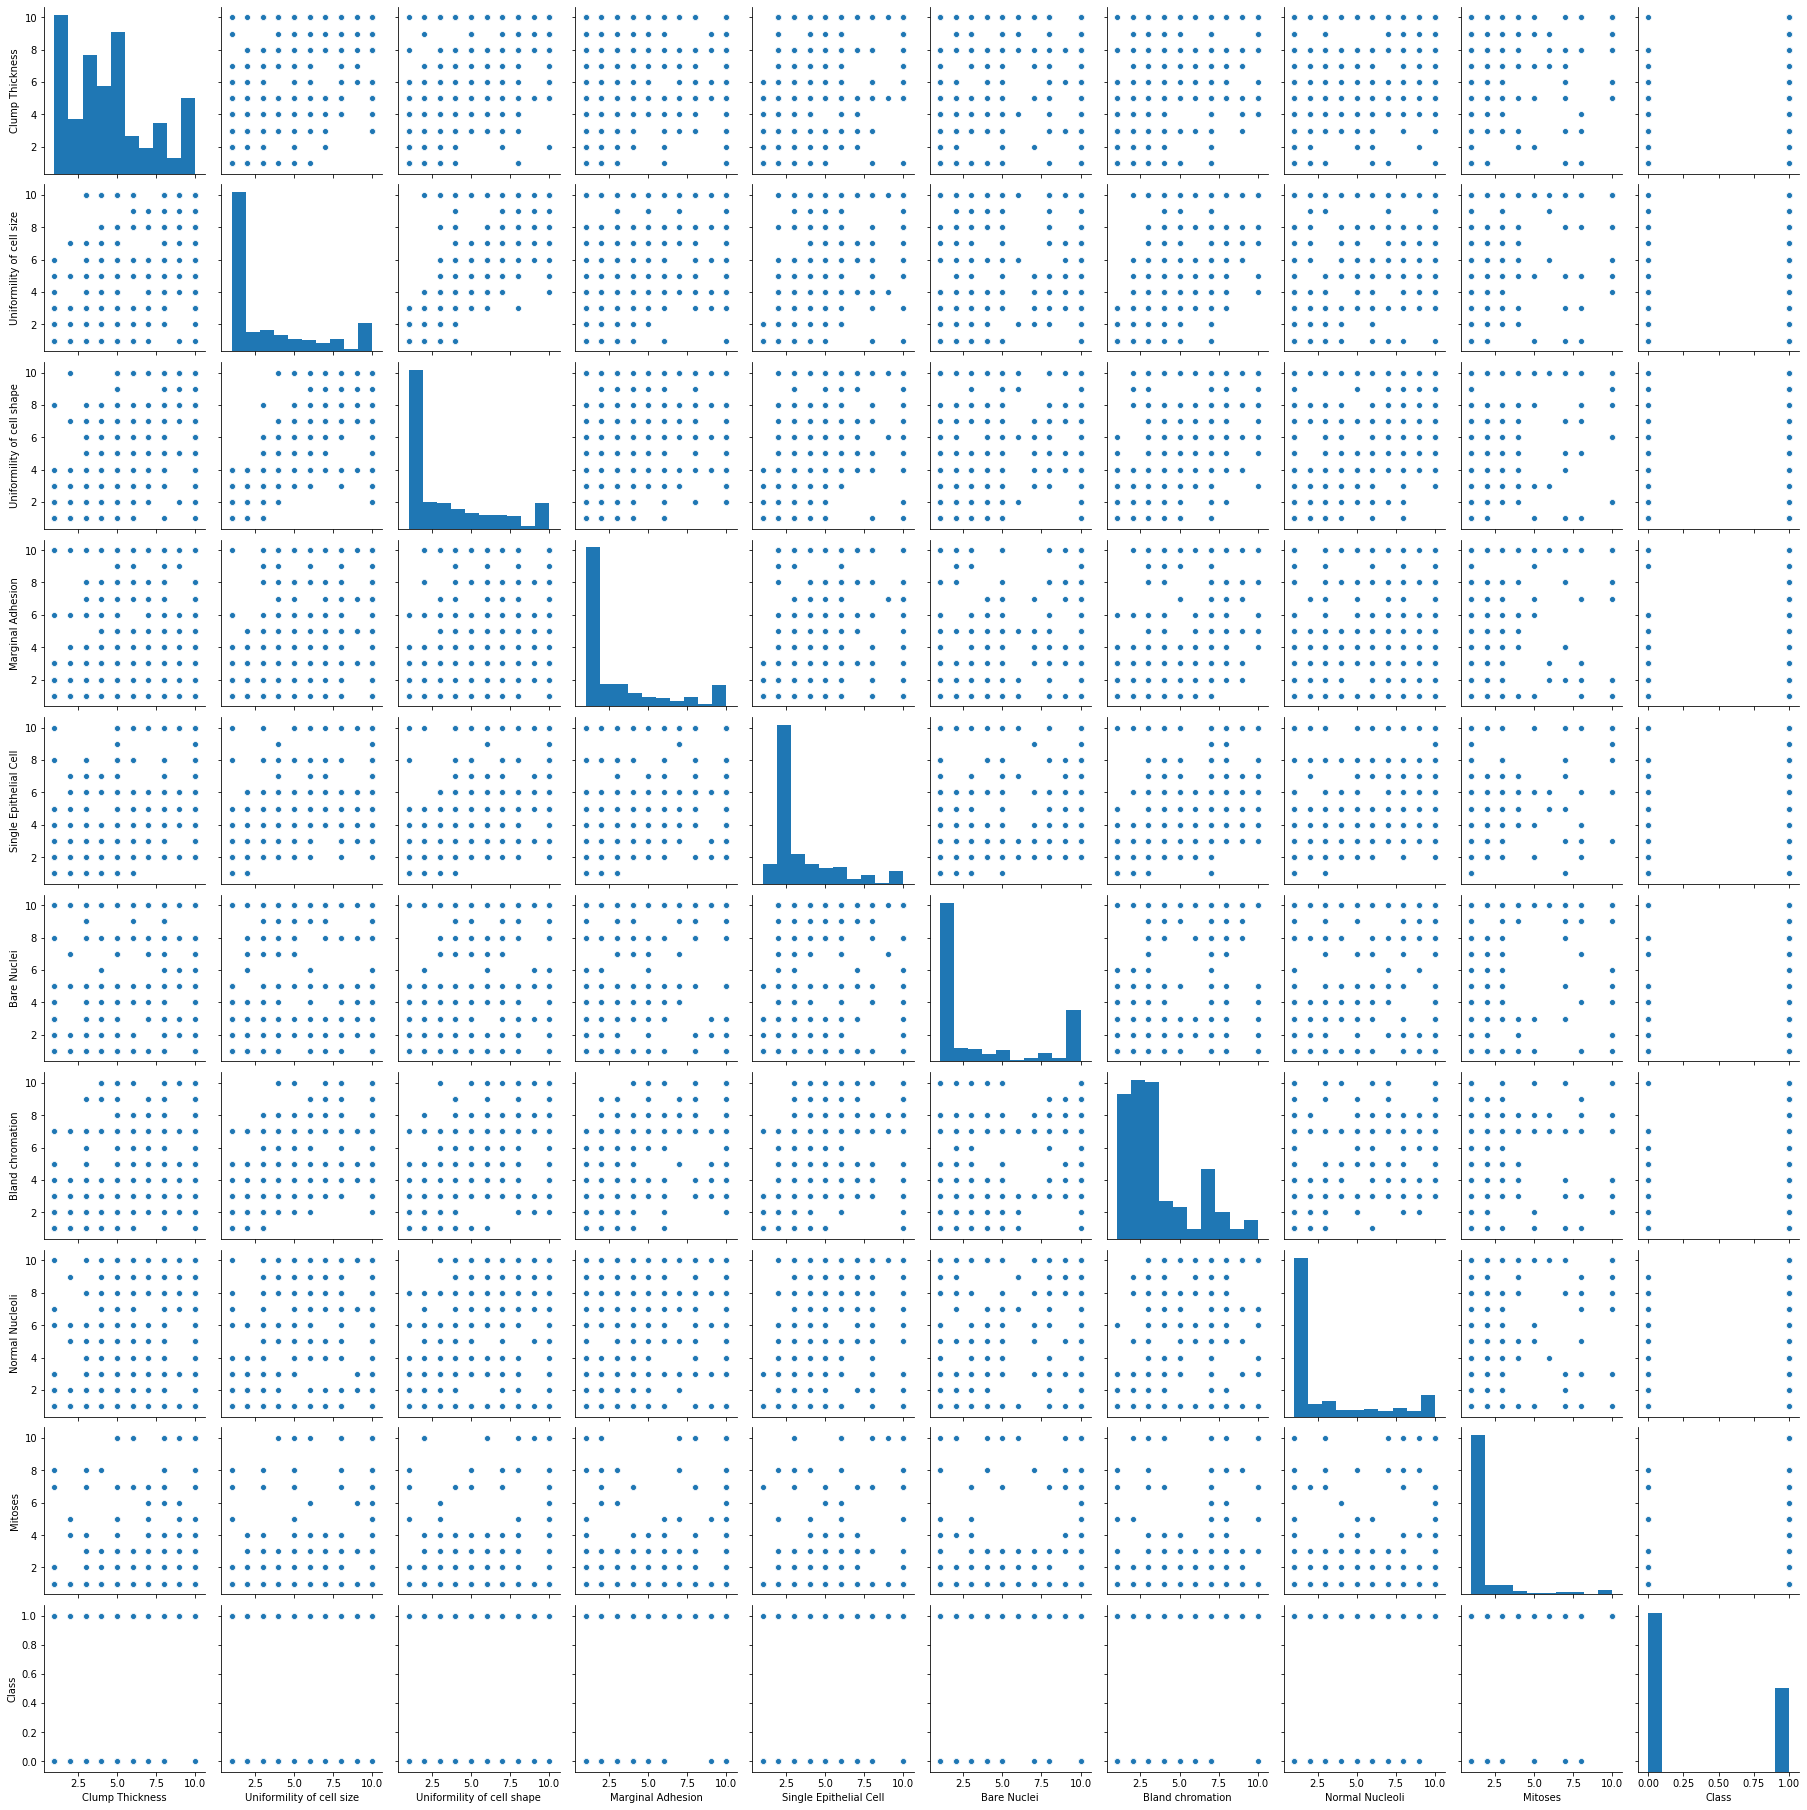

In [23]:
# Paiplot of  dataframe
sns.pairplot(df)

In [24]:
# Making the correaltion matrix
df.corr()

,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.645366,0.655089,0.486699,0.522108,0.588496,0.558511,0.536176,0.350176,0.703666
Uniformility of cell size,0.645366,1.000000,0.906814,0.705397,0.751674,0.686563,0.755824,0.722699,0.458548,0.795052
Uniformility of cell shape,0.655089,0.906814,1.000000,0.682871,0.719524,0.707773,0.736066,0.719272,0.438756,0.787350
Marginal Adhesion,0.486699,0.705397,0.682871,1.000000,0.599402,0.665965,0.666759,0.603132,0.417476,0.681827
Single Epithelial Cell,0.522108,0.751674,0.719524,0.599402,1.000000,0.582017,0.616108,0.628704,0.478975,0.663563
Bare Nuclei,0.588496,0.686563,0.707773,0.665965,0.582017,1.000000,0.674422,0.575108,0.341118,0.785082
Bland chromation,0.558511,0.755824,0.736066,0.666759,0.616108,0.674422,1.000000,0.665914,0.344118,0.728309
Normal Nucleoli,0.536176,0.722699,0.719272,0.603132,0.628704,0.575108,0.665914,1.000000,0.428185,0.699236
Mitoses,0.350176,0.458548,0.438756,0.417476,0.478975,0.341118,0.344118,0.428185,1.000000,0.412466
Class,0.703666,0.795052,0.787350,0.681827,0.663563,0.785082,0.728309,0.699236,0.412466,1.000000


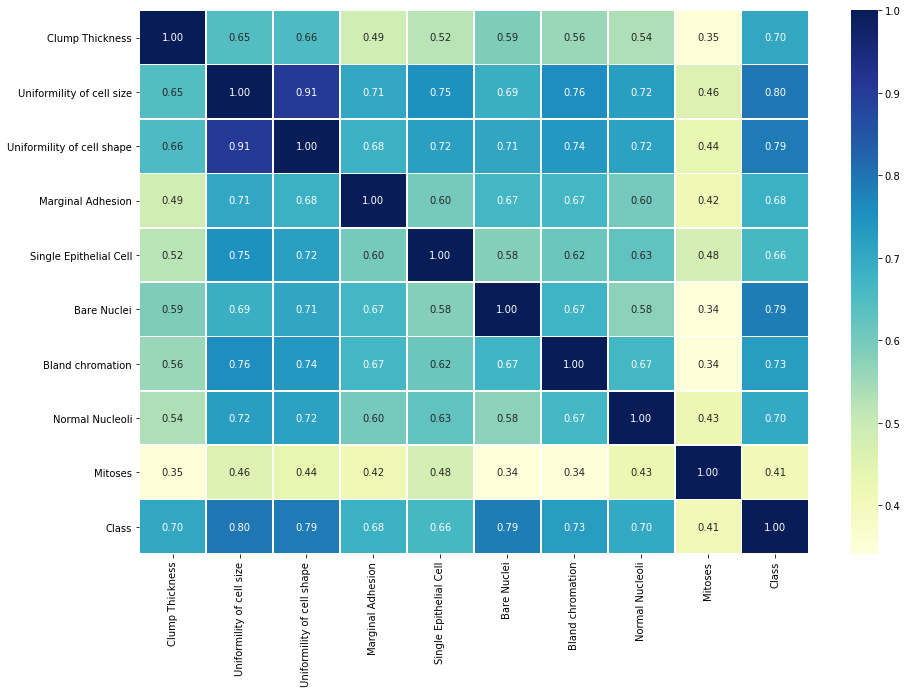

In [25]:
#making correlation matrix more understable

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidth = 0.5,
                 fmt = ".2f",
                 cmap="YlGnBu")

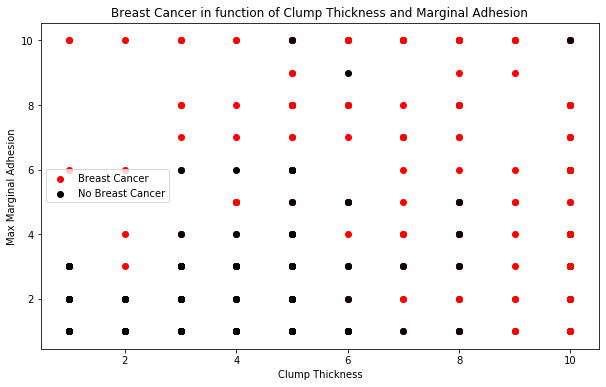

In [26]:
## CREATING ANOTHER FIGURE 

plt.figure(figsize=(10,6))

# Scatter with positive example
plt.scatter(df["Clump Thickness"][df["Class"]==1],
            df["Marginal Adhesion"][df["Class"]==1],
            color=["red"])

# Scatter with negative example 
plt.scatter(df["Clump Thickness"][df["Class"]==0],
            df["Marginal Adhesion"][df["Class"]==0],
            color=["black"]) 

plt.title("Breast Cancer in function of Clump Thickness and Marginal Adhesion")
plt.xlabel("Clump Thickness")
plt.ylabel("Max Marginal Adhesion")
plt.legend(["Breast Cancer","No Breast Cancer"])

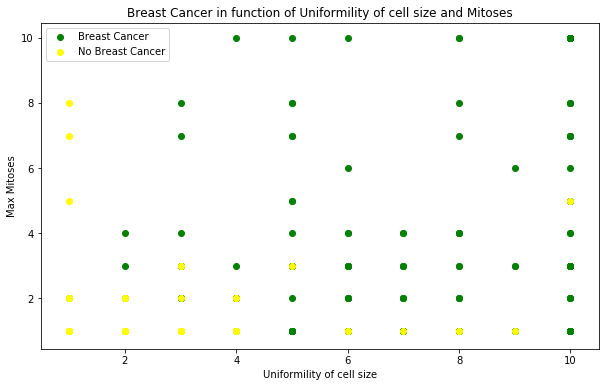

In [27]:
## CREATING ANOTHER FIGURE 

plt.figure(figsize=(10,6))

# Scatter with positive example
plt.scatter(df["Uniformility of cell size"][df["Class"]==1],
            df["Mitoses"][df["Class"]==1],
            color=["green"])

# Scatter with negative example 
plt.scatter(df["Uniformility of cell size"][df["Class"]==0],
            df["Mitoses"][df["Class"]==0],
            color=["yellow"]) 

plt.title("Breast Cancer in function of Uniformility of cell size and Mitoses")
plt.xlabel("Uniformility of cell size")
plt.ylabel("Max Mitoses")
plt.legend(["Breast Cancer","No Breast Cancer"])

## Splitting the dataset into Training and Testing dataset

In [28]:
# Split the data into X and y
X = df.drop("Class", axis=1)  ## axis = 0 (for index) and axis=1 (for column)
y = df["Class"]

In [29]:
X.shape, y.shape

((698, 9), (698,))

In [30]:
# Split data into train and  test sets
np.random.seed(42)

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((558, 9), (140, 9), (558,), (140,))

## Training and testing XGBOOST model in LOCAL MODE [No Sagemaker built-in algorithms are used]

In [32]:
# install xgboost

!pip install xgboost 

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [33]:
%%time
# Using xgboost model in local mode


# no normalization and scaling since XGBOOST is not sensitive to this 
#XGBOOST is a type of  ensemble algorithms and works by selecting thresholds or cut points on features to split a node
# won't matter if a features is scaled or not

from xgboost import XGBClassifier

#model = XGBClassifier(learning_rate = 0.01, n_estimator = 100, objective = 'binary:logistic', max_depth = 20)
model = XGBClassifier(learning_rate = 0.01, n_estimator = 500, max_depth = 20, objective = 'binary:logistic', use_label_encoder = False)
# model = XGBClassifier()

model.fit(X_train, y_train)

[17:34:05] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:34:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 592 ms, sys: 11.5 ms, total: 603 ms
Wall time: 347 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=20, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimator=500, n_estimators=100,
              n_jobs=2, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, ...)

In [34]:
# make prediction on our test data 

predict_test = model.predict(X_test)

In [35]:
predict_test

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1])

Text(15.0, 0.5, 'Predicted label')

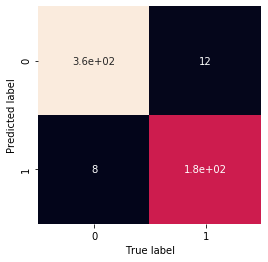

In [36]:
## Assess trained model performance on training dataset
predict_train = model.predict(X_train)

from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(confusion_matrix(y_train, predict_train),
                 annot = True,
                 cbar = False)
plt.xlabel("True label")
plt.ylabel("Predicted label")

In [37]:
# Printing the metrics for training datasets

print("Precision = {}".format(precision_score(y_train, predict_train)))
print("Recall = {}".format(recall_score(y_train, predict_train)))
print("Accuracy = {}".format(accuracy_score(y_train, predict_train)))

Precision = 0.9384615384615385
Recall = 0.9581151832460733
Accuracy = 0.96415770609319


In [38]:
# Printing the metrics for testing dataset
print("Precision = {}".format(precision_score(y_test, predict_test)))
print("Recall = {}".format(recall_score(y_test, predict_test)))
print("Accuracy = {}".format(accuracy_score(y_test, predict_test)))

Precision = 0.9056603773584906
Recall = 0.96
Accuracy = 0.95


Text(15.0, 0.5, 'Predicted label')

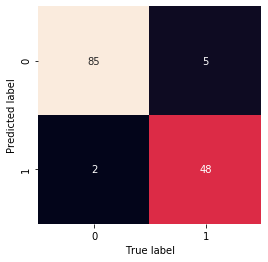

In [39]:
## Assess trained model performance on testing dataset
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(confusion_matrix(y_test, predict_test),
                 annot = True,
                 cbar = False)
plt.xlabel("True label")
plt.ylabel("Predicted label")

Tuning the XGBoost classifier using gridsearch
* starting with the parameters

The link to the Fine-tuning XGBoost in Python: <br>
https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e 

In [40]:
param_grid = {
        'gamma': [0.5, 1, 5],         # regularization parameter
        'subsample': [0.6, 0.8, 1.0], # % of rows taken to build each tree
        'colsample_bytree': [0.6, 0.8, 1.0], # number of columns used by each tree
        'max_depth': [3,4,5]                 # depth of each tree  
        }

In [41]:
xgb_model = XGBClassifier(learning_rate = 0.01, n_estimator = 500, objective = "binary:logistic")

grid = GridSearchCV(xgb_model,
                    param_grid = param_grid,
                    verbose = 4)

In [42]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....
[17:34:19] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:34:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.929, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....
[17:34:20] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:34:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.955, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....
[17:34:20] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:34:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.955, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....
[17:34:20] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:34:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.964, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....
[17:34:21] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:34:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.928, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8 .....
[17:34:21] WARNING: ../src/learner.cc:576: 
Parameters: 

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  1.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monoton...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, use_label_encoder=True,
                                     validate_parameters=N

In [43]:
y_predict_optimized = grid.predict(X_test)

In [44]:
y_predict_optimized

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1])

In [45]:
# Calculating the metrics
print("Precision: {}".format(precision_score(y_test, y_predict_optimized)))
print("Recall: {}".format(recall_score(y_test, y_predict_optimized)))
print("Precision: {}".format(accuracy_score(y_test, y_predict_optimized)))

Precision: 0.9056603773584906
Recall: 0.96
Precision: 0.95


Text(6.0, 0.5, 'Predicted Label')

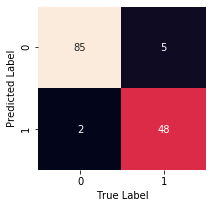

In [46]:
## plotting the confusion matrix

fig, ax = plt.subplots(figsize = (3,3))
ax = sns.heatmap(confusion_matrix(y_test, y_predict_optimized),
                 annot = True,
                 cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

## Perform the Dimensonality Reduction using PCA (Using Sagemaker)

In [47]:
# Boto3 is the Amazon Web Services (AWS) Software Development kit (SDK) for Python
# Boto3 allows python developer to write software that makes use of service like Amazon S3 and Amazon EC2

import sagemaker
import boto3
from sagemaker.session import s3_input, Session

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()

# Let's define the S3 bucket and prefix that we want to use in this session 
bucket = 'sagemaker-project'    # use the bucket name
prefix = 'pca1'                  # prefix is the subfolder within the bucket


# Execution role for the notebook instances
# this is the IAM role that was created before when creating the notebook instances. passed the role to the training job
# note that AWS Identity and Access management (IAM) role that Amazon Sagemaker can assume to perform tasks
role = sagemaker.get_execution_role()

In [48]:
print(role)

arn:aws:iam::529422516345:role/LabRole


In [49]:
X

,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses
0,5,4,4,5,7,10,3,2,1
1,3,1,1,1,2,2,3,1,1
2,6,8,8,1,3,4,3,7,1
3,4,1,1,3,2,1,3,1,1
4,8,10,10,8,7,10,9,7,1
...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2,1,1,1
694,2,1,1,1,2,1,1,1,1
695,5,10,10,3,7,3,8,10,2
696,4,8,6,4,3,4,10,6,1


In [50]:
import io    ## The io module deals with various type of I/O, binary I/O and raw I/O
import numpy as np 
import sagemaker.amazon.common as smac  # sagemaker common library (smac is to do some data conversion)

# converting the data in from numpy array format to RecordIO format 
# This format is required by  Sagemaker PCA 

buf = io.BytesIO()  # create an in-memory byte array (but is a buffer to write to)
df_matrix =  X.to_numpy()    # convert the dataframe into 2-dimensional array
smac.write_numpy_to_dense_tensor(buf, df_matrix)
buf.seek(0)

# when we write to in-memory byte array, it increments 1 every time you write to it
# resetting it back to zero

0

In [51]:
import os

# now upload the RecordIO data to s3

# key refers to the name of the of the file

key = 'pca1'

# following code upload the RecordIO data to S3 bucket to be accessed later for training 
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)


# Let's print out the training data location in S3
s3_train_data = "s3://{}/{}/train/{}".format(bucket, prefix, key)

print('upload training data location : {}'.format(s3_train_data))

upload training data location : s3://sagemaker-project/pca1/train/pca1


In [52]:
# creating the output placeholder in s3 bucket to store the output
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://sagemaker-project/pca1/output


In [53]:
## this will be used to get the training container of sagemaker built-in algorithms
## need to specify the name of the algorithm that we want to use

# let's obtain a referene to pca container image
# here all models are named estimators
# get_image_url will get the current region name using boto3.Session 

from sagemaker.amazon.amazon_estimator import image_uris
container = image_uris.retrieve(region = boto3.Session().region_name, framework = 'pca')

In [54]:
# now pass in to the container, the type of instance that is suit for training
# output path and sagemaker session into the Estimator
# can also specify how many instances to use for training 

pca = sagemaker.estimator.Estimator(container,
                                        role,
                                        instance_count = 1,
                                        instance_type = 'ml.m4.xlarge',
                                        output_path = output_location,
                                        sagemaker_session = sagemaker_session)

# Can also tune the hyperparamter like number of feature that are passed in, mode of algorithms, mini batch size and number of components

pca.set_hyperparameters(feature_dim = 9,
                        num_components = 5,
                        subtract_mean =False,
                        algorithm_mode ='regular',
                        mini_batch_size =100)

# pass in the training data from S3 to train the pca model

training_data  = {'train': s3_train_data}
pca.fit(training_data)

# see the progress using cloudwatch logs

2022-02-08 17:36:58 Starting - Starting the training job...
2022-02-08 17:37:23 Starting - Launching requested ML instancesProfilerReport-1644341818: InProgress
......
2022-02-08 17:38:24 Starting - Preparing the instances for training............
2022-02-08 17:40:27 Downloading - Downloading input data...
2022-02-08 17:41:00 Training - Training image download completed. Training in progress.
2022-02-08 17:41:00 Uploading - Uploading generated training model.Docker entrypoint called with argument(s): train
Running default environment configuration script
[02/08/2022 17:40:57 INFO 140207684908864] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-conf.json: {'algorithm_mode': 'regular', 'subtract_mean': 'true', 'extra_components': '-1', 'force_dense': 'true', 'epochs': 1, '_log_level': 'info', '_kvstore': 'dist_sync', '_num_kv_servers': 'auto', '_num_gpus': 'auto'}
[02/08/2022 17:40:57 INFO 140207684908864] Merging with provided confi

## Deploy the Trained PCA Model

In [55]:
# deploy the model to perform inference

# pca_reduction =  pca.deploy(initial_instance_count = 1,
#                             instance_type = 'ml.m4.xlarge')

In [56]:
# pca_reduction.__dict__.keys()

In [57]:
# from sagemaker.predictor import CSVSerializer, json_deserializer

# pca_reduction.content_types = 'text/csv'
# pca_reduction.serializer = CSVSerializer()
# pca_reduction.deserializer = json_deserializer


from sagemaker.deserializers import JSONDeserializer
from sagemaker.serializers import CSVSerializer

pca_reduction = pca.deploy(
    initial_instance_count=1,
    instance_type='ml.m5.xlarge',
    serializer=CSVSerializer(),
    deserializer=JSONDeserializer()
)

results = pca_reduction.predict(np.array(X))

-----!

In [58]:
results

{'projections': [{'projection': [-0.5438166856765747,
    -0.8731805682182312,
    3.777087688446045,
    3.0984487533569336,
    14.285796165466309]},
  {'projection': [0.5886075496673584,
    -0.2488318681716919,
    1.098837971687317,
    -0.9968345761299133,
    5.126300811767578]},
  {'projection': [-3.4982476234436035,
    3.9918019771575928,
    -2.7772653102874756,
    -1.6307640075683594,
    14.327804565429688]},
  {'projection': [1.5003087520599365,
    -1.7792260646820068,
    0.7948983907699585,
    -1.5606176853179932,
    5.757549285888672]},
  {'projection': [-2.2639412879943848,
    0.06512606143951416,
    -0.5489698648452759,
    2.3735103607177734,
    24.311382293701172]},
  {'projection': [0.40541157126426697,
    2.0742452144622803,
    4.7673563957214355,
    5.10208797454834,
    7.434249401092529]},
  {'projection': [-0.09608325362205505,
    -0.5344002842903137,
    -0.1443784534931183,
    -0.8731934428215027,
    4.68096399307251]},
  {'projection': [1.0048

In [59]:
# since the results are in JSON format, we access the scores by iterating through the scores in the projection

predictions = np.array([r['projection'] for r in results['projections']])

In [60]:
predictions

array([[-0.54381669, -0.87318057,  3.77708769,  3.09844875, 14.28579617],
       [ 0.58860755, -0.24883187,  1.09883797, -0.99683458,  5.12630081],
       [-3.49824762,  3.99180198, -2.77726531, -1.63076401, 14.32780457],
       ...,
       [-3.2205503 ,  2.60571575, -7.24937439, -1.61496937, 19.58786392],
       [-1.38293672,  0.78492993, -3.25026822,  0.65236461, 15.75890064],
       [-3.06803989, -0.87625259, -2.1866467 ,  1.48570633, 16.83589363]])

In [61]:
predictions.shape

(698, 5)

In [62]:
# delete endpoint
pca_reduction.delete_endpoint()

## Train and evaluate XGBOOST model on data after dimensonality reduction (using sagemaker)

In [63]:
predictions.shape

(698, 5)

In [64]:
# convert the array into dataframe in a way that target variable is set as the first column and is featured by thr following the feature column 
# sagemaker built-in algorithms expects the data in this format

train_data = pd.DataFrame({"Class": y})
train_data 

,Class
0,0
1,0
2,0
3,0
4,1
...,...
693,0
694,0
695,1
696,1


In [65]:
for i in range (predictions.shape[1]):
    train_data[i] = predictions[:,i]

In [66]:
train_data.head()

,Class,0,1,2,3,4
0,0,-0.543817,-0.873181,3.777088,3.098449,14.285796
1,0,0.588608,-0.248832,1.098838,-0.996835,5.126301
2,0,-3.498248,3.991802,-2.777265,-1.630764,14.327805
3,0,1.500309,-1.779226,0.794898,-1.560618,5.757549
4,1,-2.263941,0.065126,-0.548970,2.373510,24.311382


In [67]:
train_data.shape

(698, 6)

In [68]:
train_data_size = int(0.8 * train_data.shape[0])
train_data_size

558

In [69]:
# shuffle the data in dataframe and then split the dataframe into train, test and validation set 
import sklearn

train_data = sklearn.utils.shuffle(train_data)
train, test, valid = train_data[:train_data_size], train_data[train_data_size:train_data_size + 70], train_data[train_data_size + 70:]

In [70]:
train.shape, test.shape, valid.shape

((558, 6), (70, 6), (70, 6))

In [71]:
X_tst, y_tst = test.drop("Class", axis = 1), test["Class"]

In [72]:
X_tst.shape, y_tst.shape

((70, 5), (70,))

In [73]:
# saving the train_data and validation_data as csv file
train.to_csv('train.csv', index = False, header = False)


In [74]:
valid.to_csv('valid.csv', index = False, header = False)

In [75]:
prefix = 'XGBoost-Classifier'
key = 'XGBoost-Classifier'

In [76]:
# read the data from csv file and then upload to the s3 bucket
with open('train.csv','rb') as f:
    # the following code is to upload the data into s3 bucket for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)
    
#printng out the training data location in S3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-project/XGBoost-Classifier/train/XGBoost-Classifier


In [77]:
# read the data from csv file and then upload to the s3 bucket
with open('valid.csv','rb') as f:
    # the following code is to upload the data into s3 bucket for validating later
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'valid', key)).upload_fileobj(f)
    
#printng out the training data location in S3
s3_valid_data = 's3://{}/{}/valid/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_valid_data))

uploaded validation data location: s3://sagemaker-project/XGBoost-Classifier/valid/XGBoost-Classifier


In [78]:
# creates the output placeholder in s3 bucket to store the linear learner output

output_location = "s3://{}/{}/output".format(bucket, prefix)
print("training artifacts will be uploaded to: {}".format(output_location))

training artifacts will be uploaded to: s3://sagemaker-project/XGBoost-Classifier/output


In [79]:
## for getting the training container of sagemkaer built-in algorithms
# just specify the name of the algorithm

container = image_uris.retrieve(region = boto3.Session().region_name, framework = 'xgboost', version = '1.3-1')

In [102]:
# now specifying the type of instance that is going to used for training 
# output path and sagemaker session into the Estimator



Xgboost_classifier = sagemaker.estimator.Estimator(container,
                                                  role, 
                                                  instance_count = 1,
                                                  instance_type = 'ml.m4.xlarge',
                                                  output_path = output_location,
                                                  sagemaker_session = sagemaker_session)

# Tuning the hyperparameter to improve the performance of the model 

# num_round: the number of rounds to run the training
# eta: Step size shrinkage used in updates to prevent overfitting. 
#      After each boosting step, you can directly get the weights of new features. 
#      The eta parameter actually shrinks the feature weights to make the boosting process more conservative.

Xgboost_classifier.set_hyperparameters(max_depth = 3,
                                      objective = 'multi:softmax',
                                      num_class = 2,
                                      eta = 0.5,
                                      num_round = 150 )

Link to the hyperparameter of XGBoost: <br>
    https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost_hyperparameters.html 

creating the "train", "validation" channels to feed in the model <br>

Source : <br>
https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

In [104]:
train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type = 'csv', s3_data_type = 'S3Prefix')
valid_input =  sagemaker.session.s3_input(s3_data = s3_valid_data, content_type = 'csv', s3_data_type = 'S3Prefix')


Xgboost_classifier.fit({'train': train_input, 'validation': valid_input})

The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


2022-02-09 05:10:42 Starting - Starting the training job...
2022-02-09 05:11:12 Starting - Launching requested ML instancesProfilerReport-1644383442: InProgress
.........
2022-02-09 05:12:33 Starting - Preparing the instances for training...........................
2022-02-09 05:17:15 Starting - Launched instance was unhealthy, replacing it!...
2022-02-09 05:17:34 Starting - Insufficient capacity error from EC2 while launching instances, retrying!............
2022-02-09 05:19:35 Starting - Preparing the instances for training.........
2022-02-09 05:21:17 Downloading - Downloading input data
2022-02-09 05:21:17 Training - Downloading the training image...
2022-02-09 05:21:45 Training - Training image download completed. Training in progress..[2022-02-09 05:21:47.718 ip-10-0-243-15.ec2.internal:1 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2022-02-09:05:21:47:INFO] Imported framework sagemaker_xgboost_container.training
[2022-02-09:05:21:47:INFO] Failed to parse hyperparameter

## Deploy and test the trained XGBOOST Model 

In [105]:
# Xgboost_classifier = Xgboost_classifier.deploy(initial_instance_count = 1,
#                                                instance_type = 'ml.m4.xlarge')

In [106]:
# from sagemaker.predictor import csv_serializer, json_deserializer 

# Xgboost_classifier.content_types = 'text/csv'
# Xgboost_classifier.serializer = csv_serializer
# Xgboost_classifier.deserializer =  None 

In [230]:
# deploy the model to perform inference

# from sagemaker.deserializers import JSONDeserializer
# from sagemaker.serializers import CSVSerializer

# Xgb = Xgboost_classifier.deploy(
#     initial_instance_count=1,
#     instance_type='ml.m5.xlarge',
#     serializer=CSVSerializer(),
#     deserializer=JSONDeserializer()
# )

xgb_predictor = Xgboost_classifier.deploy(initial_instance_count=1,
                serializer = sagemaker.serializers.CSVSerializer(),
                instance_type='ml.m4.xlarge')

-----------!

In [211]:
X_tst.shape

(70, 5)

In [212]:
X_tst.head()

,0,1,2,3,4
2,-3.498248,3.991802,-2.777265,-1.630764,14.327805
6,-0.096083,-0.534400,-0.144378,-0.873193,4.680964
311,1.848783,-5.663917,-3.024359,-2.950897,16.118418
568,-1.933632,-4.965989,-0.048907,-1.126549,21.830460
364,0.334279,-0.525937,0.054629,-0.884563,3.988427


In [232]:
XGB_predictions = xgb_predictor.predict(np.array(X_tst))

In [233]:
XGB_predictions

b'1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0'

In [234]:
# # converting a comma-separated values (CSV) file, and store it in a string buffer.
# batch_X_tst_csv_buffer = io.StringIO()
# X_tst.to_csv(batch_X_tst_csv_buffer, header=False, index=False)
# test_row = batch_X_tst_csv_buffer.getvalue()
# print(test_row)

In [235]:
# xgb_predictor.predict(test_row)

In [236]:
# predicted_values = np.array(xgb_predictor)
# predicted_values = predicted_values.reshape(-1,1)

In [237]:
# predicted_values.dtype

In [238]:
# #custom code to convert the values in byte format to array

def bytes_2_array(x):
    
    m = str(x).split(',')
    
    #since the first element contains unwanted character like (b ,',') removing them
    m[0] = m[0][2:]
    
    #same thing as above remove the unwanted last character (')
    m[-1] = m[-1][:-1]
    
    #iterating through the list of the strings and converting them into float type
    for i in range(len(m)):
        m[i] = float(m[i])
        
    #converting the list into array
    m = np.array(m).astype('float32')
    
    #reshaping 1-dimesional array to the 2-Dimensional array
    return m.reshape(-1,1)

In [239]:
predicted_values = bytes_2_array(XGB_predictions)

In [240]:
predicted_values

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [241]:
y_tst = np.array(y_tst)
y_tst = y_tst.reshape(-1,1)

In [242]:
y_tst

array([[0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [243]:
y_tst.dtype

dtype('int64')

In [245]:
# # Printing the metrics 

print("Precision = {}".format(precision_score(y_tst, predicted_values, average = 'macro')))
print("Recall = {}".format(recall_score(y_tst, predicted_values, average = 'macro')))
print("Accuracy = {}".format(accuracy_score(y_tst, predicted_values)))

Precision = 0.9838709677419355
Recall = 0.9875
Accuracy = 0.9857142857142858


Text(24.0, 0.5, 'Predicted label')

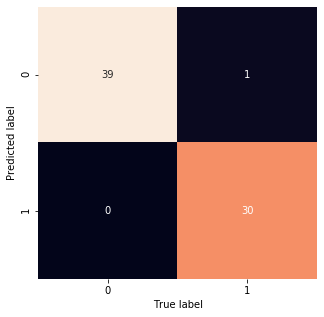

In [251]:
#plot confusion matrix
cm = confusion_matrix(y_tst, predicted_values)
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.heatmap(cm,
                 annot = True,
                 cbar = False)
plt.xlabel("True label")
plt.ylabel("Predicted label")